## BCIS 5110 Analysis of JD Data

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [1]:
import pandas as pd

2. Read in the five csv files.

In [2]:
orderData = pd.read_csv("JD_order_data.csv")
userData = pd.read_csv("JD_user_data.csv")
deliveryData = pd.read_csv("JD_delivery_data.csv")
inventoryData = pd.read_csv("JD_inventory_data.csv")
networkData = pd.read_csv("JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [3]:
print("Sample of order data: ",orderData.head())
numObservationsOrder = len(orderData)
numColumnsOrder = orderData.shape[1]
columnNamesOrder = orderData.columns

print("Number of Observations:", numObservationsOrder)
print("Number of Columns:", numColumnsOrder)
print("Column Names:", columnNamesOrder)

Sample of order data:       order_ID     user_ID      sku_ID  order_date             order_time  \
0  d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   

   quantity  type promise  original_unit_price  final_unit_price  \
0         1     2       -                 89.0              79.0   
1         1     1       2                 99.9              53.9   
2         1     1       2                 78.0              58.5   
3         1     1       2                 61.0              35.0   
4         1     1       1                 78.0              53.0   

   direct_discount_per_unit  quantity_discount_per_unit  \
0                       0.0                        1

In [4]:
print("Sample of user data: ",userData.head())
numObservationsUser = len(userData)
numColumnsUser = userData.shape[1]
columnNamesUser = userData.columns

print("Number of Observations:", numObservationsUser)
print("Number of Columns:", numColumnsUser)
print("Column Names:", columnNamesUser)

Sample of user data:        user_ID  user_level first_order_month  plus gender    age  \
0  000089d6a6           1           2017-08     0      F  26-35   
1  0000babd1f           1           2018-03     0      U      U   
2  0000bc018b           3           2016-06     0      F   >=56   
3  0000d0e5ab           3           2014-06     0      M  26-35   
4  0000dce472           3           2012-08     1      U      U   

  marital_status  education  city_level  purchase_power  
0              S          3           4               3  
1              U         -1          -1              -1  
2              M          3           2               3  
3              M          3           2               2  
4              U         -1          -1              -1  
Number of Observations: 457298
Number of Columns: 10
Column Names: Index(['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age',
       'marital_status', 'education', 'city_level', 'purchase_power'],
      dtype

In [5]:
print("Sample of delivery data: ",deliveryData.head())
numObservationsDelivery = len(deliveryData)
numColumnsDelivery = deliveryData.shape[1]
columnNamesDelivery = deliveryData.columns

print("Number of Observations:", numObservationsDelivery)
print("Number of Columns:", numColumnsDelivery)
print("Column Names:", columnNamesDelivery)

Sample of delivery data:     package_ID    order_ID  type        ship_out_time     arr_station_time  \
0  dc3d6d2258  dc3d6d2258     1  2018-03-01 08:00:00  2018-03-01 15:00:00   
1  19802a570c  19802a570c     1  2018-03-01 10:00:00  2018-03-01 15:00:00   
2  e22627af66  e22627af66     1  2018-03-01 11:00:00  2018-03-01 15:00:00   
3  50d11a586d  50d11a586d     1  2018-03-01 10:00:00  2018-03-01 16:00:00   
4  a3bfe38bf4  a3bfe38bf4     1  2018-03-01 11:00:00  2018-03-01 16:00:00   

              arr_time  
0  2018-03-01 18:00:00  
1  2018-03-01 17:00:00  
2  2018-03-01 17:00:00  
3  2018-03-01 19:00:00  
4  2018-03-01 17:00:00  
Number of Observations: 293229
Number of Columns: 6
Column Names: Index(['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time',
       'arr_time'],
      dtype='object')


In [6]:
print("Sample of inventory data: ",inventoryData.head())
numObservationsInventory = len(inventoryData)
numColumnsInventory = inventoryData.shape[1]
columnNamesInventory = inventoryData.columns

print("Number of Observations:", numObservationsInventory)
print("Number of Columns:", numColumnsInventory)
print("Column Names:", columnNamesInventory)

Sample of inventory data:     dc_ID      sku_ID        date
0      9  50f6f91962  2018-03-01
1      9  7f0ddbcdde  2018-03-01
2      9  8ad5789d74  2018-03-01
3      9  468d34eda4  2018-03-01
4      9  460afaddb6  2018-03-01
Number of Observations: 136079
Number of Columns: 3
Column Names: Index(['dc_ID', 'sku_ID', 'date'], dtype='object')


In [7]:
print("Sample of network data: ",networkData.head())
numObservationsNetwork = len(networkData)
numColumnsNetwork = networkData.shape[1]
columnNamesNetwork = networkData.columns

print("Number of Observations:", numObservationsNetwork)
print("Number of Columns:", numColumnsNetwork)
print("Column Names:", columnNamesNetwork)

Sample of network data:     region_ID  dc_ID
0          2     57
1          2     43
2          2     42
3          2     66
4          2     20
Number of Observations: 56
Number of Columns: 2
Column Names: Index(['region_ID', 'dc_ID'], dtype='object')


4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [8]:
missingValuesOrder = orderData.isnull().sum()
print(missingValuesOrder)
print("There are no missing values in any of the columns in the orderData DataFrame. ")

order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
There are no missing values in any of the columns in the orderData DataFrame. 


In [9]:
missingValuesUser = userData.isnull().sum()
print(missingValuesUser)
print("There are no missing values in any of the columns in the userData DataFrame. ")

user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64
There are no missing values in any of the columns in the userData DataFrame. 


In [10]:
missingValuesDelivery = deliveryData.isnull().sum()
print(missingValuesDelivery)
print("There are no missing values in any of the columns in the deliveryData DataFrame. ")

package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time    0
arr_time            0
dtype: int64
There are no missing values in any of the columns in the deliveryData DataFrame. 


In [11]:
missingValuesInventory = inventoryData.isnull().sum()
print(missingValuesInventory)
print("There are no missing values in any of the columns in the inventoryData DataFrame. ")

dc_ID     0
sku_ID    0
date      0
dtype: int64
There are no missing values in any of the columns in the inventoryData DataFrame. 


In [12]:
missingValuesNetwork = networkData.isnull().sum()
print(missingValuesNetwork)
print("There are no missing values in any of the columns in the networkData DataFrame. ")

region_ID    0
dc_ID        0
dtype: int64
There are no missing values in any of the columns in the networkData DataFrame. 


5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [13]:
PromiseValues = orderData['promise'].unique()
print(PromiseValues)
print("The unusual value is '-' (dash), which is not a typical numerical or categorical value. It seems to represent a specific category related to promise.")

['-' '2' '1' '3' '4' '5' '6' '7' '8']
The unusual value is '-' (dash), which is not a typical numerical or categorical value. It seems to represent a specific category related to promise.


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [14]:
promiseCounts = orderData['promise'].value_counts()
print("Number of Observations for Each Value in 'promise' Variable:")
print(promiseCounts)
print("The dash value has maximum number of observations compared to other promise values")

Number of Observations for Each Value in 'promise' Variable:
-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64
The dash value has maximum number of observations compared to other promise values


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [15]:
sortedOrderData = orderData[['type', 'promise']].sort_values(by='type', ascending=False)
print(sortedOrderData.head(10))
print(sortedOrderData.tail(10))

print("The first 10 observations all have 'type' equal to 2 and 'promise' equal to '-'. The last 10 observations all have 'type' equal to 1, and 'promise' values are either 1 or 2. The meaning of the 'type' variable is not explicitly clear. It appears that 'type' might be a categorical variable with two levels (1 and 2)")

        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2
The first 10 observations all have 'type' equal to 2 and 'promise' equal to '-'. The last 10 observations all have 'type' equal to 1, and 'promise' values are either 1 or 2. The meaning of the 'type' variable is not explicitly clear. It appears that 'type' might be a categorical variable with two levels (1 and 2)


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [16]:
print("Inner merge: An inner merge, combines two tables using a common key (in this case, 'order_ID') and includes only the rows where there is a match in the key between both tables. ")

innerMergedData = pd.merge(orderData, deliveryData, on='order_ID', how='inner')
print("Number of observations in merged data",innerMergedData.shape[0])
print("Number of observations in orders data",orderData.shape[0])
print("Number of observations in delivery data",deliveryData.shape[0])

print("The inner merge reveals that there is not a one-to-one match between orders and deliveries. Some orders lack delivery information, and some deliveries lack order information.")

Inner merge: An inner merge, combines two tables using a common key (in this case, 'order_ID') and includes only the rows where there is a match in the key between both tables. 
Number of observations in merged data 326862
Number of observations in orders data 549989
Number of observations in delivery data 293229
The inner merge reveals that there is not a one-to-one match between orders and deliveries. Some orders lack delivery information, and some deliveries lack order information.


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [17]:
print("Right merge: A right merge (also known as a right join) combines two tables by including all the rows from the right table (in this case, the 'delivery' table) and the matching rows from the left table (in this case, the 'order' table). ")

rightMergedData = pd.merge(orderData, deliveryData, on='order_ID', how='right')
print("Number of observations after the right merge ",rightMergedData.shape[0])

print("In summary, the right merge includes all delivery records but may not include all orders, and some deliveries may not have matching order information.")

Right merge: A right merge (also known as a right join) combines two tables by including all the rows from the right table (in this case, the 'delivery' table) and the matching rows from the left table (in this case, the 'order' table). 
Number of observations after the right merge  326862
In summary, the right merge includes all delivery records but may not include all orders, and some deliveries may not have matching order information.


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [18]:
print("Left merge: A left merge (or left join) combines two tables by including all the rows from the left table (in this case, the 'order' table) and the matching rows from the right table (in this case, the 'delivery' table). ")
leftMergedData = pd.merge(orderData, deliveryData, on='order_ID', how='left')

print("Number of observations after the left merge ", leftMergedData.shape[0])
print("Number of observations in order table", orderData.shape[0])

print("In summary, the left merge includes all orders from the 'order' table but may also include additional delivery records that do not have matching order information. This additional information may correspond to deliveries without orders or might be due to data quality issues.")

Left merge: A left merge (or left join) combines two tables by including all the rows from the left table (in this case, the 'order' table) and the matching rows from the right table (in this case, the 'delivery' table). 
Number of observations after the left merge  550017
Number of observations in order table 549989
In summary, the left merge includes all orders from the 'order' table but may also include additional delivery records that do not have matching order information. This additional information may correspond to deliveries without orders or might be due to data quality issues.


### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [19]:
innerMergedData.info()
innerMergedData['type_x'] = innerMergedData['type_y'].combine_first(innerMergedData['type_x'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326862 entries, 0 to 326861
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    326862 non-null  object 
 1   user_ID                     326862 non-null  object 
 2   sku_ID                      326862 non-null  object 
 3   order_date                  326862 non-null  object 
 4   order_time                  326862 non-null  object 
 5   quantity                    326862 non-null  int64  
 6   type_x                      326862 non-null  int64  
 7   promise                     326862 non-null  object 
 8   original_unit_price         326862 non-null  float64
 9   final_unit_price            326862 non-null  float64
 10  direct_discount_per_unit    326862 non-null  float64
 11  quantity_discount_per_unit  326862 non-null  float64
 12  bundle_discount_per_unit    326862 non-null  float64
 13  coupon_discoun

Then compare the values of the two variables are the same.

In [20]:
print("Are the values consistent? ", (innerMergedData['type_x'] == innerMergedData['type_y']).all())

Are the values consistent?  True


If they are, please drop one of them.

In [21]:
innerMergedData = innerMergedData.drop(columns=['type_y'])
innerMergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326862 entries, 0 to 326861
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_ID                    326862 non-null  object 
 1   user_ID                     326862 non-null  object 
 2   sku_ID                      326862 non-null  object 
 3   order_date                  326862 non-null  object 
 4   order_time                  326862 non-null  object 
 5   quantity                    326862 non-null  int64  
 6   type_x                      326862 non-null  int64  
 7   promise                     326862 non-null  object 
 8   original_unit_price         326862 non-null  float64
 9   final_unit_price            326862 non-null  float64
 10  direct_discount_per_unit    326862 non-null  float64
 11  quantity_discount_per_unit  326862 non-null  float64
 12  bundle_discount_per_unit    326862 non-null  float64
 13  coupon_discoun

12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [22]:
single_item_orders = innerMergedData['order_ID'].duplicated(keep=False)
innerMergedData['single_item_order'] = ~single_item_orders
print(innerMergedData)

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326858  9fa0694b3b  39933e9bc6  767ac490ed  2018-03-31  2018-03-31 19:51:43.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

Then we filter the data to remove those orders of a single gift item. Save the changes.

In [23]:
filtered_table = innerMergedData[~((innerMergedData['single_item_order']) & (innerMergedData['gift_item'] == 1))]
print(filtered_table)

          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f  2018-03-31  2018-03-31 13:47:52.0   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [24]:

package_counts = filtered_table.groupby('order_ID')['package_ID'].transform('nunique')
print(package_counts,"------")
# Create a new variable to indicate orders with multiple packages
filtered_table['multiple_packages'] = package_counts > 1
print(filtered_table)
# Filter out orders with multiple packages
filtered_table = filtered_table[~filtered_table['multiple_packages']]
print(filtered_table)

0         1
1         1
2         1
3         1
4         1
         ..
326856    1
326857    1
326859    1
326860    1
326861    1
Name: package_ID, Length: 314539, dtype: int64 ------
          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f  2018-03-31  2018-03-31 13:47:52.0   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
3268

/var/folders/0x/vgp13hw91p159mlbfln715480000gn/T/ipykernel_2975/3931900428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_table['multiple_packages'] = package_counts > 1


14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [25]:
time_cols = ['order_date', 'order_time', 'ship_out_time', 'arr_station_time', 'arr_time']
filtered_table[time_cols] = filtered_table[time_cols].apply(pd.to_datetime)

In [26]:
filtered_table['order_day'] = filtered_table['order_date'].dt.day

In [27]:
filtered_table['order_hour'] = filtered_table['order_time'].dt.hour

In [28]:
filtered_table['delivery_time'] = filtered_table['arr_time'] - filtered_table['order_time']

print(filtered_table)

          order_ID     user_ID      sku_ID order_date          order_time  \
0       7444318d01  33a9e56257  067b673f2b 2018-03-01 2018-03-01 11:10:40   
1       f973b01694  4ea3cf408f  623d0a582a 2018-03-01 2018-03-01 09:13:26   
2       8c1cec8d4b  b87cb736cb  fc5289b139 2018-03-01 2018-03-01 21:29:50   
3       d43a33c38a  4829223b6f  623d0a582a 2018-03-01 2018-03-01 19:13:37   
4       e0f5386d87  0b07cae293  589c2b865b 2018-03-01 2018-03-01 21:09:15   
...            ...         ...         ...        ...                 ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f 2018-03-31 2018-03-31 13:47:52   
326857  5fd298d448  165ee3e319  f7280c119d 2018-03-31 2018-03-31 12:42:35   
326859  c9d77a7ed0  18f92434cd  7f53769d3f 2018-03-31 2018-03-31 08:55:57   
326860  b9ad79338f  b5caf8a580  8dc4a01dec 2018-03-31 2018-03-31 13:31:01   
326861  02d31f05c9  f260895cbe  10d369ef96 2018-03-31 2018-03-31 18:21:16   

        quantity  type_x promise  original_unit_price  final_unit_price  ..

15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [29]:
filtered_table['delivery_time_hours'] = filtered_table['delivery_time'].apply(lambda x: x.total_seconds() / 3600)
print(filtered_table.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314486 entries, 0 to 326861
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   order_ID                    314486 non-null  object         
 1   user_ID                     314486 non-null  object         
 2   sku_ID                      314486 non-null  object         
 3   order_date                  314486 non-null  datetime64[ns] 
 4   order_time                  314486 non-null  datetime64[ns] 
 5   quantity                    314486 non-null  int64          
 6   type_x                      314486 non-null  int64          
 7   promise                     314486 non-null  object         
 8   original_unit_price         314486 non-null  float64        
 9   final_unit_price            314486 non-null  float64        
 10  direct_discount_per_unit    314486 non-null  float64        
 11  quantity_discount_per_unit

16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [30]:
package_counts = filtered_table.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique().reset_index()

# Sort by the total number of packages in descending order
sorted_package_counts = package_counts.sort_values(by='package_ID', ascending=False)

# Display the pairs with the highest traffic
highest_traffic_pairs = sorted_package_counts.head()

# Print the result
print("Pairs with Highest Traffic:")
print(highest_traffic_pairs)

Pairs with Highest Traffic:
     dc_ori  dc_des  package_ID
31        5       5       30136
6         2       2       22590
71        9       9       22160
23        4       4       19973
120      24      24       12229


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [31]:
print("order data", orderData)
gift_orders = orderData[orderData['gift_item'] == 1]
print("gift ordrs", gift_orders)
# Examine original_unit_price and final_unit_price
print(gift_orders[['original_unit_price', 'final_unit_price']])
# The zeros moight represent data errors

order data           order_ID     user_ID      sku_ID  order_date             order_time  \
0       d0cf5cc6db  0abe9ef2ce  581d5b54c1  2018-03-01  2018-03-01 17:14:25.0   
1       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
2       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
3       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
4       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
...            ...         ...         ...         ...                    ...   
549984  3ad06b9fbe  a27b3ed4d4  a9109972d1  2018-03-31  2018-03-31 01:22:47.0   
549985  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
549986  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
549987  be3a9414b1  20ba6655f3  2dd6b818ec  2018-03-31  2018-03-31 12:51:18.0   
549988  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity

18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [32]:
product_orders = orderData[(orderData['sku_ID'] == 'a0e49f9966') & (orderData['order_date'] == '2018-3-15')]
print(product_orders)
# Calculate sales by multiplying quantity and final_price
product_orders['sales'] = product_orders['quantity'] * product_orders['final_unit_price']

# Display the sales for each order
print(product_orders[['order_ID', 'sales']])

# Calculate total sales
total_sales = product_orders['sales'].sum()

# Display the total sales
print("Total Sales:", total_sales)


Empty DataFrame
Columns: [order_ID, user_ID, sku_ID, order_date, order_time, quantity, type, promise, original_unit_price, final_unit_price, direct_discount_per_unit, quantity_discount_per_unit, bundle_discount_per_unit, coupon_discount_per_unit, gift_item, dc_ori, dc_des]
Index: []
Empty DataFrame
Columns: [order_ID, sales]
Index: []
Total Sales: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [33]:
pivot_table = pd.pivot_table(userData, values='user_ID', index=['user_level', 'education'], aggfunc='count')
print(pivot_table)


                      user_ID
user_level education         
-1         -1            2294
            3               9
 0         -1             145
            2               7
            3               8
            4               1
 1         -1           66391
            1            3001
            2           24182
            3           35486
            4             369
 2         -1           28310
            1            3270
            2           32953
            3           75907
            4            1419
 3         -1            8201
            1            1260
            2           13418
            3           68944
            4            4979
 4         -1            4023
            1             629
            2            3606
            3           37548
            4           39922
 10        -1            1005
            2               2
            3               6
            4               3


20. Answer one of your descriptive questions using groupby or pivot table.

In [34]:
print("1. What is the average quantity of products ordered by customers in March 2018?")
march_2018_orders = orderData[(orderData['order_date'] >= '2018-03-01') & (orderData['order_date'] <= '2018-03-31')]
average_quantity_march = march_2018_orders['quantity'].mean()
print("Average Quantity in March 2018:", average_quantity_march)

1. What is the average quantity of products ordered by customers in March 2018?
Average Quantity in March 2018: 1.2166697879412134


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [35]:
userData.info()

# Change data types for specific variables
userData['user_level'] = userData['user_level'].astype('string')
userData['education'] = userData['education'].astype('string')
userData['city_level'] = userData['city_level'].astype('string')
userData['purchase_power'] = userData['purchase_power'].astype('string')

# Verify the changes
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   us

22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [36]:
userData['user_level'] = userData['user_level'].replace({'-1': 'New', '10': 'Bus'}).astype('string')

# Verify the changes
userData['user_level'].value_counts()  # Display the updated value counts


2      141859
1      129429
3       96802
4       85728
New      2303
Bus      1016
0         161
Name: user_level, dtype: Int64

2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [37]:
columns_to_replace = ['education', 'city_level', 'purchase_power']
userData[columns_to_replace] = userData[columns_to_replace].replace({'-1': 'U'}).astype('string')

# Verify the changes
for column in columns_to_replace:
    print(f"Unique values in {column} after replacement: {userData[column].unique()}")


Unique values in education after replacement: <StringArray>
['3', 'U', '2', '4', '1']
Length: 5, dtype: string
Unique values in city_level after replacement: <StringArray>
['4', 'U', '2', '3', '1', '5']
Length: 6, dtype: string
Unique values in purchase_power after replacement: <StringArray>
['3', 'U', '2', '1', '4', '5']
Length: 6, dtype: string


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

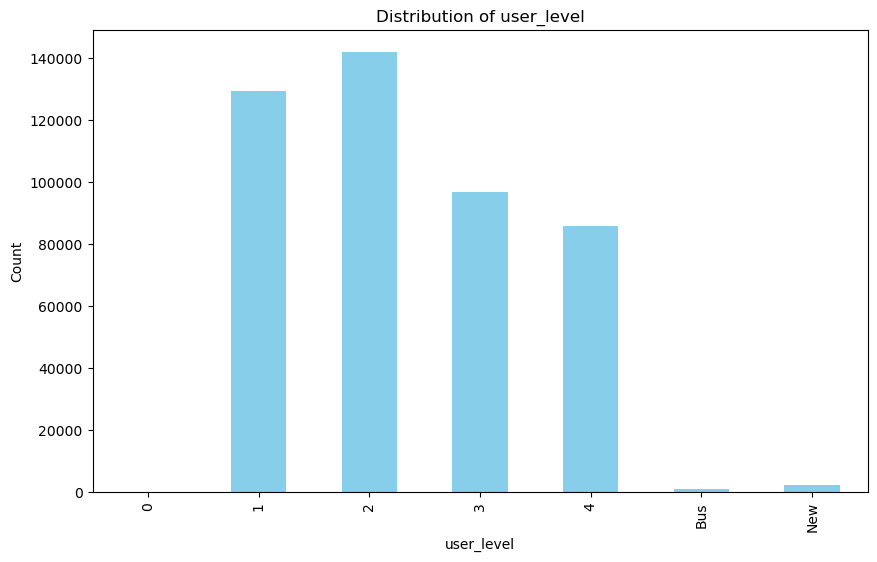

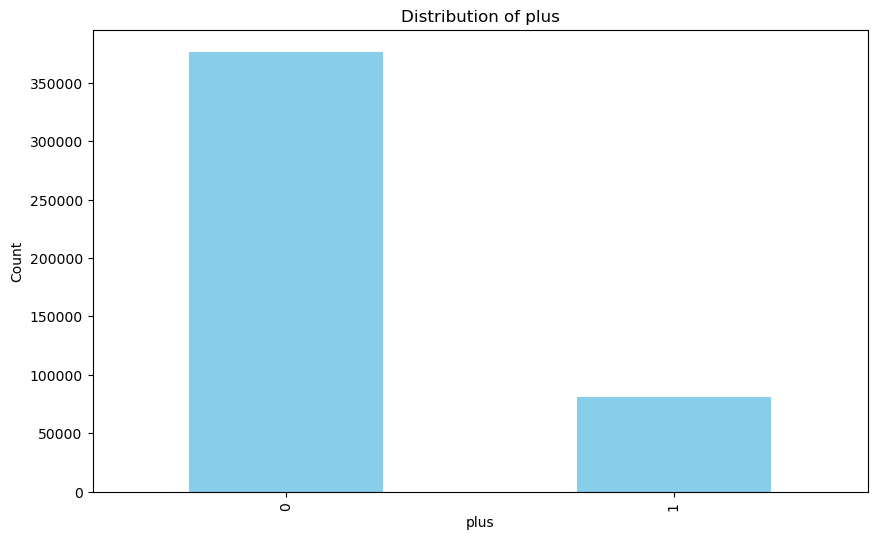

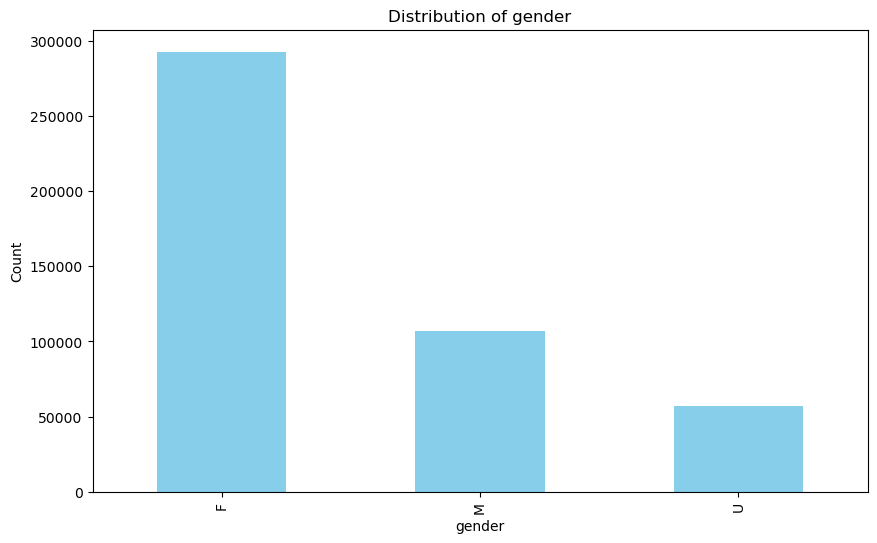

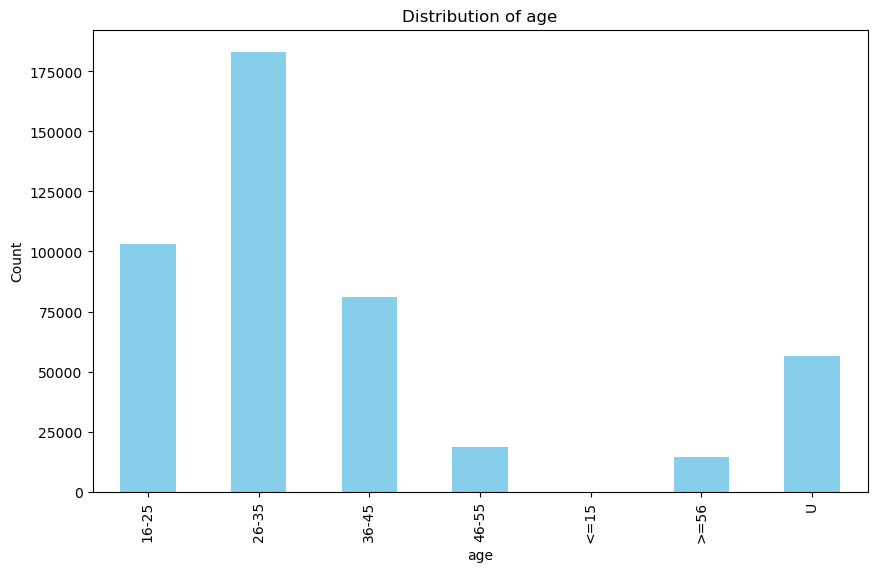

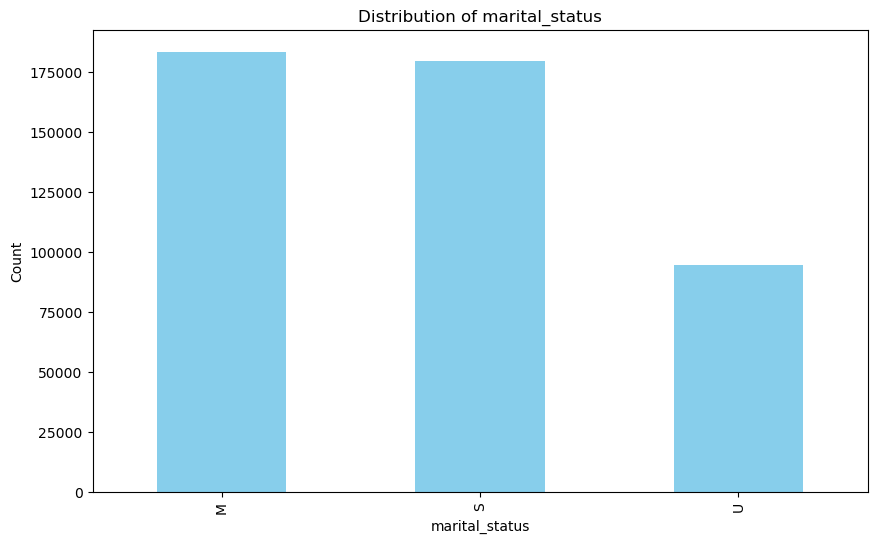

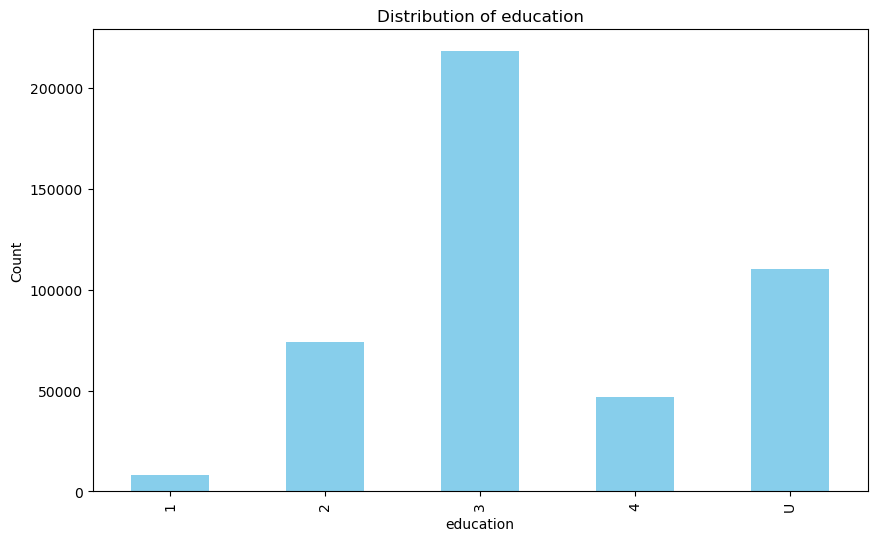

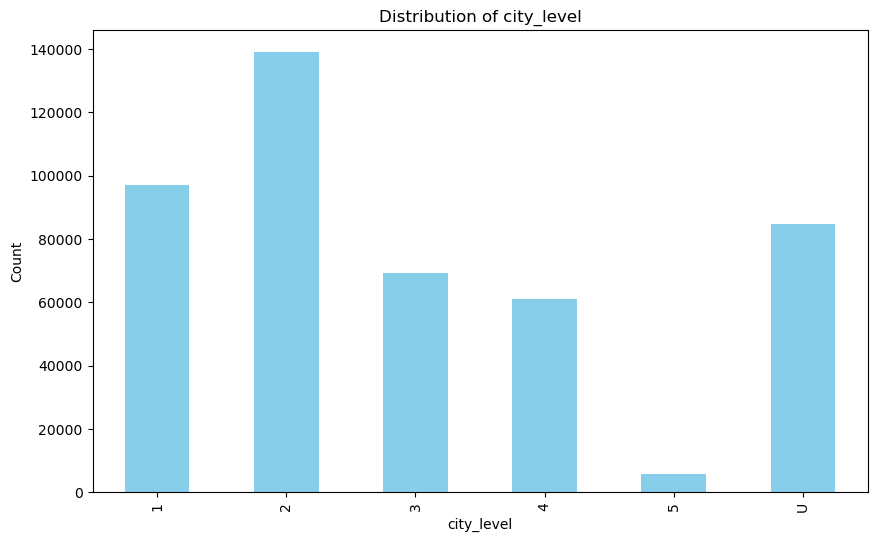

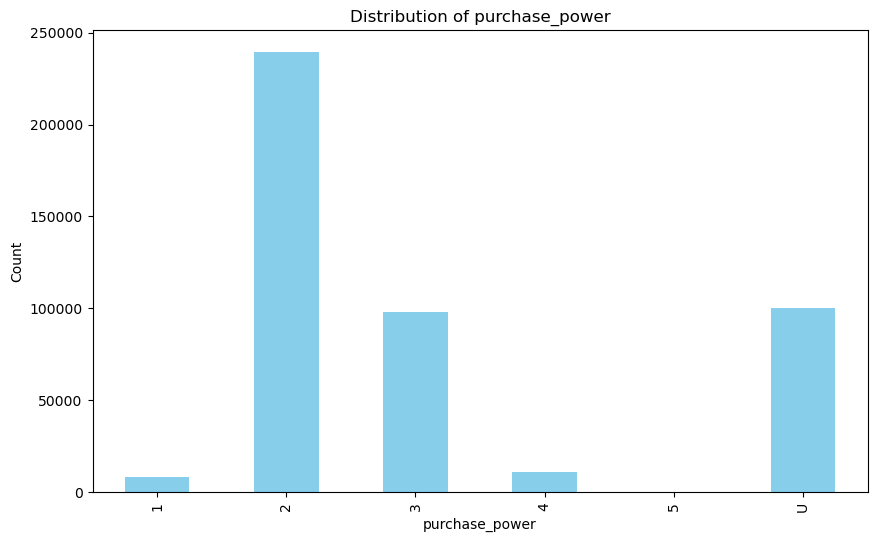

Education of most users is mapped to 3
Age level of most users is from 26-35


In [38]:
import matplotlib.pyplot as plt

# Specify categorical columns
categorical_columns = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

# Create bar graphs for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    userData[column].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
    
print("Education of most users is mapped to 3")
print("Age level of most users is from 26-35")

25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

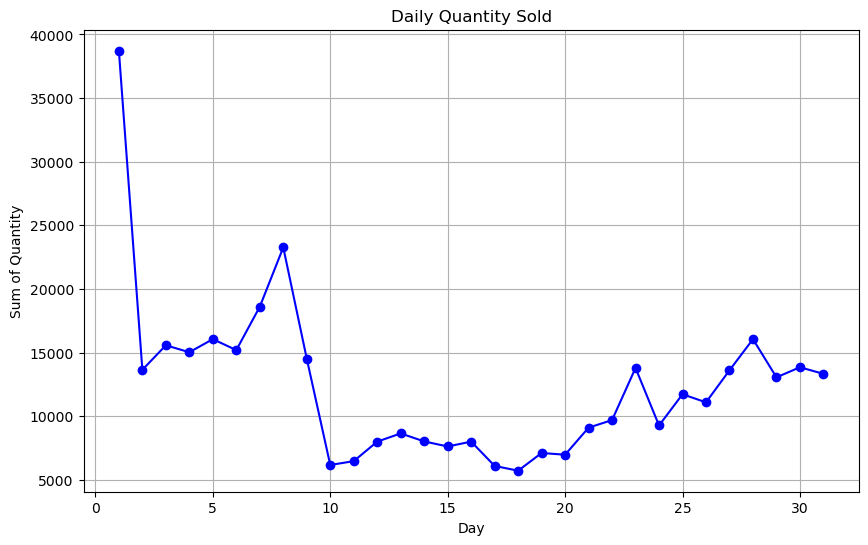

The day with the most quantity sold is Day 1 with a total of 38719 units.


In [39]:
# Sum the quantity by day
daily_quantity_sum = filtered_table.groupby('order_day')['quantity'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_quantity_sum.index, daily_quantity_sum.values, marker='o', linestyle='-', color='b')
plt.title('Daily Quantity Sold')
plt.xlabel('Day')
plt.ylabel('Sum of Quantity')
plt.grid(True)
plt.show()

# Find the day with the most quantity sold
max_quantity_day = daily_quantity_sum.idxmax()
max_quantity_value = daily_quantity_sum.max()
print(f"The day with the most quantity sold is Day {max_quantity_day} with a total of {max_quantity_value} units.")

26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

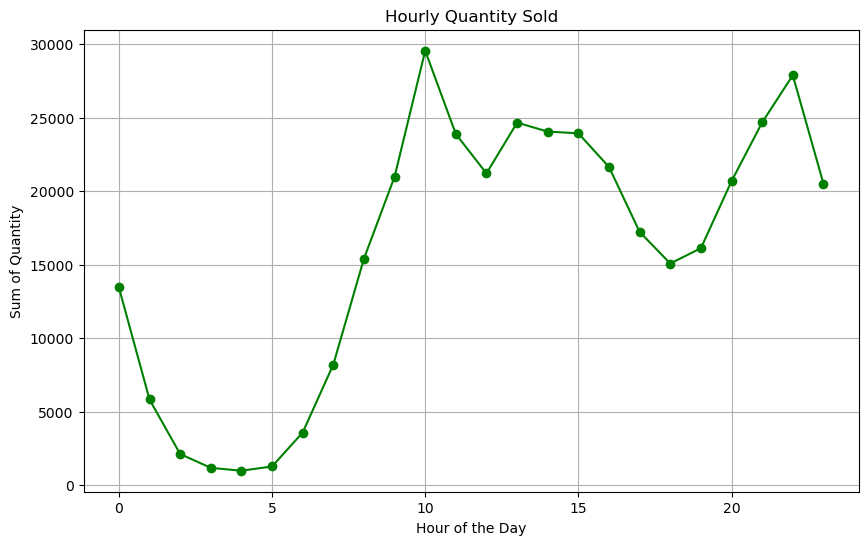

The peak time for orders is at 10:00 with a total of 29543 units.


In [40]:
# Sum the quantity by hour
hourly_quantity_sum = filtered_table.groupby('order_hour')['quantity'].sum()

# Create a line graph for hourly quantities
plt.figure(figsize=(10, 6))
plt.plot(hourly_quantity_sum.index, hourly_quantity_sum.values, marker='o', linestyle='-', color='g')
plt.title('Hourly Quantity Sold')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum of Quantity')
plt.grid(True)
plt.show()

# Find the peak time for orders
peak_hour = hourly_quantity_sum.idxmax()
peak_hour_quantity = hourly_quantity_sum.max()
print(f"The peak time for orders is at {peak_hour}:00 with a total of {peak_hour_quantity} units.")


27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [41]:
# Use describe() to check the statistics of 'original_unit_price'
price_statistics = filtered_table['original_unit_price'].describe()

# Extract specific statistics
min_price = price_statistics['min']
max_price = price_statistics['max']
median_price = price_statistics['50%']  # 50% corresponds to the median

# Print the results
print(f"Minimum original unit price: {min_price}")
print(f"Maximum original unit price: {max_price}")
print(f"Median original unit price: {median_price}")


Minimum original unit price: 0.0
Maximum original unit price: 7130.0
Median original unit price: 85.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [42]:
# Find the percentage of observations with 'original_unit_price' greater than 350
percentage_above_350 = (filtered_table['original_unit_price'] > 350).mean() * 100
print(f"Percentage of observations with 'original_unit_price' > 350: {percentage_above_350:.2f}%")

# Filter the dataset to exclude observations with 'original_unit_price' > 350
filtered_table = filtered_table[filtered_table['original_unit_price'] <= 350]


Percentage of observations with 'original_unit_price' > 350: 0.65%


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

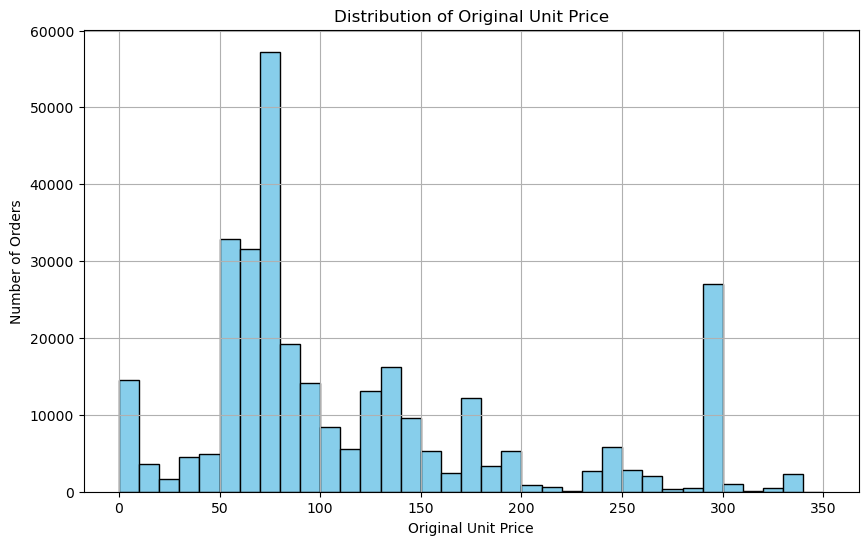

The price range with the most orders is 70.0-80.0.


In [43]:
# Create a histogram to examine the distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_table['original_unit_price'], bins=range(0, 360, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of Original Unit Price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Identify the price range with the most orders
most_orders_price_range = (filtered_table['original_unit_price'] // 10 * 10).mode().values[0]
print(f"The price range with the most orders is {most_orders_price_range}-{most_orders_price_range + 10}.")


28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

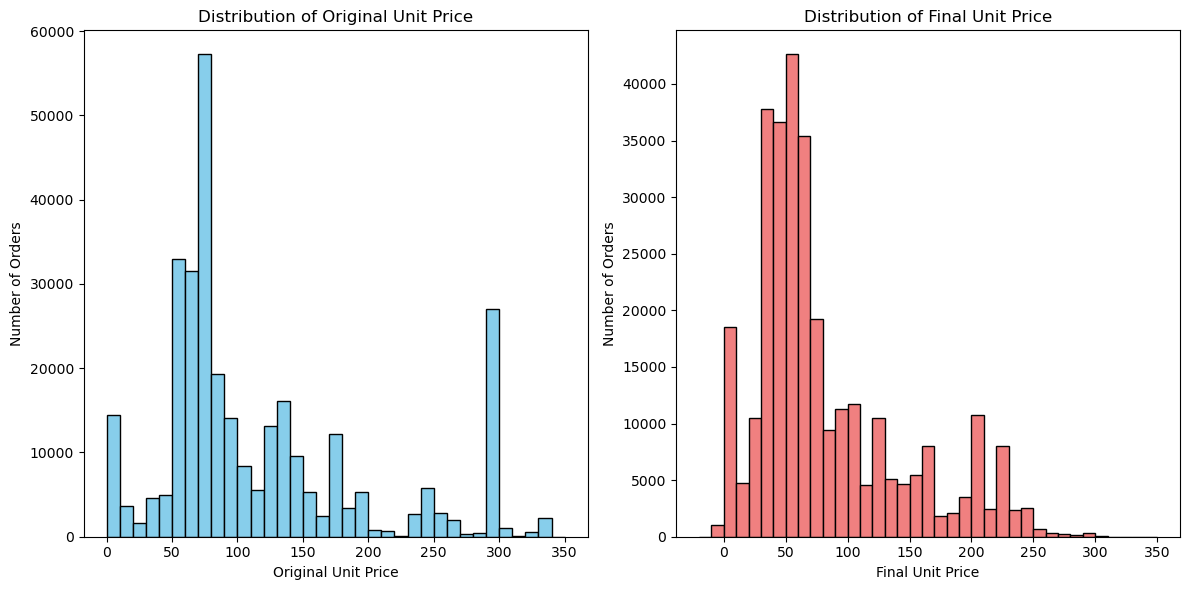

In [44]:
# Create histograms for both original and final unit prices
plt.figure(figsize=(12, 6))

# Histogram for original unit price
plt.subplot(1, 2, 1)
plt.hist(filtered_table['original_unit_price'], bins=range(0, 360, 10), color='skyblue', edgecolor='black')
plt.title('Distribution of Original Unit Price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')

# Histogram for final unit price
plt.subplot(1, 2, 2)
plt.hist(filtered_table['final_unit_price'], bins=range(-20, 360, 10), color='lightcoral', edgecolor='black')
plt.title('Distribution of Final Unit Price')
plt.xlabel('Final Unit Price')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()
 # The differnece can be seen between the two graphs

29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

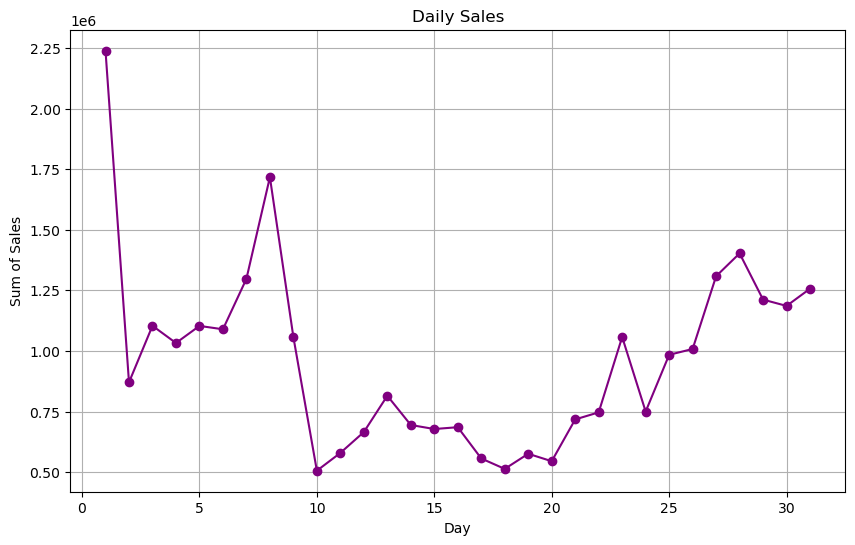

The day with the highest sales is Day 1 with a total of $2238730.70.


In [45]:
# Create a new variable 'sales' by multiplying quantity and final unit price
filtered_table['sales'] = filtered_table['quantity'] * filtered_table['final_unit_price']

# Sum the sales by day
daily_sales_sum = filtered_table.groupby('order_day')['sales'].sum()

# Create a line graph for daily sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_sum.index, daily_sales_sum.values, marker='o', linestyle='-', color='purple')
plt.title('Daily Sales')
plt.xlabel('Day')
plt.ylabel('Sum of Sales')
plt.grid(True)
plt.show()

# Find the day with the highest sales
max_sales_day = daily_sales_sum.idxmax()
max_sales_value = daily_sales_sum.max()
print(f"The day with the highest sales is Day {max_sales_day} with a total of ${max_sales_value:.2f}.")


30. Try to answer one descriptive question you asked in your project initial report.

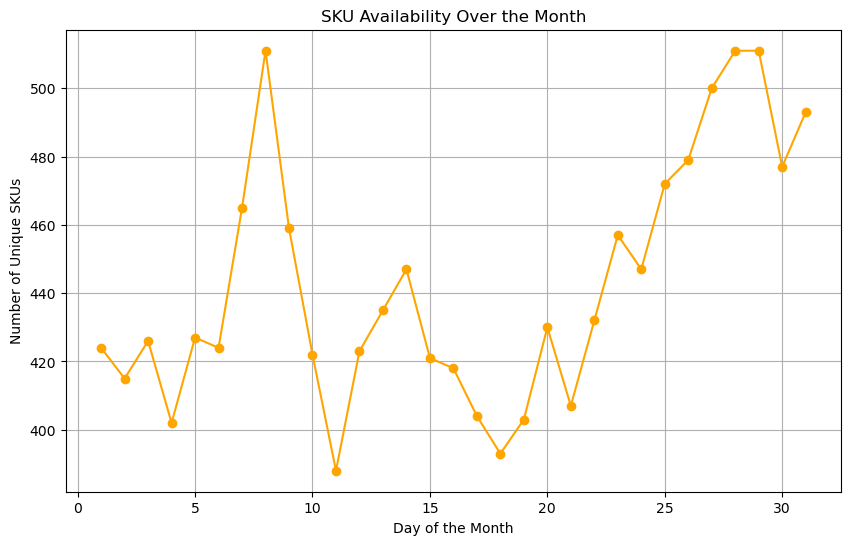

In [46]:
# 3. Can we identify any patterns in SKU availability over the course of the month?
# Extract day of the month from the order date
filtered_table['order_day'] = filtered_table['order_date'].dt.day

# Calculate the number of unique SKUs available each day
sku_availability_by_day = filtered_table.groupby('order_day')['sku_ID'].nunique()

# Create a line graph for SKU availability over the course of the month
plt.figure(figsize=(10, 6))
plt.plot(sku_availability_by_day.index, sku_availability_by_day.values, marker='o', linestyle='-', color='orange')
plt.title('SKU Availability Over the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Unique SKUs')
plt.grid(True)
plt.show()


### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [49]:
# Original value of items
filtered_table['originValue'] = filtered_table['original_unit_price'] \
                                        * filtered_table['quantity']

# Final value of items                                    
filtered_table['finalValue'] = filtered_table['final_unit_price'] \
                                    * filtered_table['quantity']                                   

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [50]:
agg_dict = {
    'user_ID': 'first',
    'type_x': 'first',
    'delivery_time': 'first',
    'order_day': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = filtered_table.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [68]:
order_user = pd.merge(order_agg, userData, on = 'user_ID', how = 'inner')
order_user.head()

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0,New,2017-10,0,U,U,U,U,U,U
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0,1,2017-08,0,U,U,U,U,U,U
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0,2,2016-06,0,F,16-25,S,3,2,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1,2,2016-01,0,F,16-25,S,3,1,2
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0,2,2016-03,0,F,26-35,M,3,U,2


33. We need to code a few more variables.

In [69]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]
order_user.head()

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,gift_item,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,0,New,2017-10,0,U,U,U,U,U,U
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,0,1,2017-08,0,U,U,U,U,U,U
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,0,2,2016-06,0,F,16-25,S,3,2,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,1,2,2016-01,0,F,16-25,S,3,1,2
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,0,2,2016-03,0,F,26-35,M,3,U,2


In [70]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)
order_user.info()
order_user.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278169 entries, 0 to 278977
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   order_ID           278169 non-null  object         
 1   user_ID            278169 non-null  object         
 2   type_x             278169 non-null  int64          
 3   delivery_time      278169 non-null  timedelta64[ns]
 4   order_day          278169 non-null  int64          
 5   order_hour         278169 non-null  int64          
 6   sku_ID             278169 non-null  int64          
 7   quantity           278169 non-null  int64          
 8   originValue        278169 non-null  float64        
 9   finalValue         278169 non-null  float64        
 10  gift_item          278169 non-null  int64          
 11  user_level         278169 non-null  string         
 12  first_order_month  278169 non-null  object         
 13  plus               278169 non

,order_ID,user_ID,type_x,delivery_time,order_day,order_hour,sku_ID,quantity,originValue,finalValue,...,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power,dis_rate,busy_hour
0,0000095025,57648ed1fc,1,0 days 22:48:26,19,11,1,1,230.0,176.2,...,2017-10,0,U,U,U,U,U,U,0.233913,1
1,00000e13eb,c113527e40,0,2 days 05:19:18,9,12,1,1,56.0,56.0,...,2017-08,0,U,U,U,U,U,U,0.000000,1
2,0000132b39,c4f5626c0d,1,0 days 22:29:25,13,16,1,1,89.0,85.0,...,2016-06,0,F,16-25,S,3,2,1,0.044944,1
3,000064fa67,99439045cb,1,0 days 08:03:43,2,10,2,2,298.0,208.0,...,2016-01,0,F,16-25,S,3,1,2,0.302013,1
4,0000bde331,20d84fc11a,1,0 days 21:37:06,17,14,1,1,59.9,39.9,...,2016-03,0,F,26-35,M,3,U,2,0.333890,1


34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [71]:
# Extract relevant columns
features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']
target = 'delivery_time'

# Create a new DataFrame with selected features and the target variable
analysis_data = order_user[features + [target]]

# Display the first few rows of the new DataFrame
print(analysis_data.head())


   type_x  sku_ID  quantity  finalValue  gift_item  plus  dis_rate  busy_hour  \
0       1       1         1       176.2          0     0  0.233913          1   
1       0       1         1        56.0          0     0  0.000000          1   
2       1       1         1        85.0          0     0  0.044944          1   
3       1       2         2       208.0          1     0  0.302013          1   
4       1       1         1        39.9          0     0  0.333890          1   

    delivery_time  
0 0 days 22:48:26  
1 2 days 05:19:18  
2 0 days 22:29:25  
3 0 days 08:03:43  
4 0 days 21:37:06  


35. Prepare the training and test datasets

In [72]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour']
target = 'delivery_time'

# Extract features and target variable
X = order_user[features]
y = order_user[target]

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (222535, 8) (222535,)
Test set shape: (55634, 8) (55634,)


36. Train a Decision Tree regression model.

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Convert datetime values to numeric representation
y_test_numeric = y_test.astype(int)  # Convert to timestamp

# Evaluate the model performance
mse = mean_squared_error(y_test_numeric, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 8.991101504436006e+27
Root Mean Squared Error: 94821419017203.11


37. Make predictions on the testing data.

In [76]:
# Assuming you already have a trained model 'tree_regressor'
# and your testing data is stored in a variable 'X_test'

# Make predictions on the testing data
y_pred = tree_regressor.predict(X_test)

# Display the predicted values
print("Predicted Delivery Times:")
print(y_pred)


Predicted Delivery Times:
[1.65529500e+14 1.85570333e+14 9.89558125e+13 ... 2.65749000e+14
 1.07203177e+14 8.00273333e+13]


38. Evaluate the model using RMSE

In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you already have a trained model 'tree_regressor'
# and your testing data is stored in a variable 'X_test'

# Make predictions on the testing data
y_pred = tree_regressor.predict(X_test)

# Convert datetime values to numeric representation
y_test_numeric = y_test.astype(int)  # Convert to timestamp

# Evaluate the model performance
mse = mean_squared_error(y_test_numeric, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values are exceptionally high, 
# indicating significant inaccuracies in your model's predictions.
# This suggests a need for improvement, possibly by revising features, model architecture, or the training process.

Mean Squared Error: 8.991101504436006e+27
Root Mean Squared Error: 94821419017203.11


In [ ]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['delivery_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.